In [1]:
import sklearn
# Import all of the scikit learn stuff
from __future__ import print_function
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import warnings
# Suppress warnings from pandas library warnings.filterwarnings("ignore", category=DeprecationWarning,
import numpy as np
import os
import languageProcess as lp

In [16]:
articles=[]
path='../RandomBaseline/plaindata'
categories=os.listdir(path)
categories=[cat for cat in categories if os.path.exists(path+"/"+cat+"/AA/wiki_00")]
for cat in categories:
    filepath = path+"/"+cat+"/AA/wiki_00"
    if os.path.exists(filepath):               #Save all base articles in an array of arrays
        articles += [lp.languageProcess(filepath).getWords()]

In [19]:
test = [' '.join(block) for block in articles]


In [20]:
vectorizer= TfidfVectorizer()
dtm = vectorizer.fit_transform(test)
pd.DataFrame(dtm.toarray(),index=categories,columns=vectorizer.get_feature_names ()).head(10)

,aba,abandonment,abbreviation,abduction,ability,abolition,abort,abortifacient,abortion,aboveground,...,youth,zero,zimbabwe,zinc,zone,zoo,zoologist,zoology,по,अम
Culture_20,0.0,0.010581,0.0,0.0,0.010481,0.0,0.010581,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
Nature_20,0.0,0.000000,0.0,0.0,0.009782,0.0,0.000000,0.0,0.0,0.003086,...,0.000000,0.0,0.0,0.012344,0.000000,0.0,0.004629,0.002742,0.0,0.000000
Concepts_20,0.0,0.000000,0.0,0.0,0.006625,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
History_20,0.0,0.000000,0.0,0.0,0.012642,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
Technology_20,0.0,0.000000,0.0,0.0,0.005608,0.0,0.000000,0.0,0.0,0.000000,...,0.011459,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
Arts_20,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.009627,0.0,0.000000,0.000000,0.0,0.000000
Entertainment_20,0.0,0.000000,0.0,0.0,0.007051,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
Business_20,0.0,0.000000,0.0,0.0,0.016866,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
Society_20,0.0,0.000000,0.0,0.0,0.003865,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
Life_20,0.0,0.000000,0.0,0.0,0.052159,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.011447


In [21]:
# Get words that correspond to each column
vectorizer.get_feature_names()

['aba',
 'abandonment',
 'abbreviation',
 'abduction',
 'ability',
 'abolition',
 'abort',
 'abortifacient',
 'abortion',
 'aboveground',
 'absence',
 'absolute',
 'absolutism',
 'absorption',
 'absurdity',
 'abu',
 'abundance',
 'abuse',
 'academy',
 'accelerator',
 'acceptance',
 'access',
 'accessory',
 'accident',
 'accomplishment',
 'accordance',
 'accordion',
 'account',
 'accumulation',
 'accuracy',
 'accusation',
 'accuser',
 'acetylation',
 'achievement',
 'acid',
 'acidification',
 'acidity',
 'acquisition',
 'acre',
 'act',
 'action',
 'activation',
 'activism',
 'activist',
 'activity',
 'actor',
 'actress',
 'actuality',
 'acute',
 'adaptation',
 'addict',
 'addiction',
 'addition',
 'address',
 'adduct',
 'adherent',
 'adhesion',
 'adjective',
 'adjunct',
 'adjustment',
 'administration',
 'administrator',
 'admirer',
 'admission',
 'adolescent',
 'adopt',
 'adoption',
 'adult',
 'adulthood',
 'advance',
 'advancement',
 'advantage',
 'adventure',
 'adverb',
 'advertiseme

In [32]:
# Fit LSA. Use algorithm = “randomized” for large datasets
#lsa = TruncatedSVD(99, algorithm = 'arpack')
lsa = TruncatedSVD(n_components=27,algorithm='arpack')
dtm_lsa = lsa.fit_transform(dtm.asfptype())
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

ValueError: k must be between 1 and min(A.shape), k=27

In [23]:
pd.DataFrame(lsa.components_,index = ["component_1","component_2"],columns = vectorizer.get_feature_names())

,aba,abandonment,abbreviation,abduction,ability,abolition,abort,abortifacient,abortion,aboveground,...,youth,zero,zimbabwe,zinc,zone,zoo,zoologist,zoology,по,अम
component_1,0.001787,0.001455,0.001772,0.001569,0.028064,0.000574,0.001455,0.002176,0.009249,0.000179,...,0.005058,0.000644,0.002772,0.000717,0.006745,0.001710,0.000269,0.001172,0.001181,0.001684
component_2,0.002989,-0.003054,-0.001052,0.002571,-0.007118,0.000901,-0.003054,0.006894,0.029298,-0.000172,...,0.007217,0.000852,0.005163,-0.000688,0.003918,0.001787,-0.000258,0.000906,-0.000701,-0.001453


In [24]:
pd.DataFrame(dtm_lsa, index = categories, columns = ["component_1","component_2" ])

,component_1,component_2
Culture_20,0.758594,-0.651564
Nature_20,0.930737,-0.365689
Concepts_20,0.953921,-0.300057
History_20,0.874302,-0.485382
Technology_20,0.999002,0.044665
Arts_20,0.672891,-0.739742
Entertainment_20,0.849467,-0.527642
Business_20,0.903688,0.428191
Society_20,0.956158,0.292853
Life_20,0.942947,-0.332943


In [25]:
xs = [w[0] for w in dtm_lsa]
ys = [w[1] for w in dtm_lsa]
xs, ys

([0.7585938101100724,
  0.9307372532249725,
  0.9539213595332268,
  0.8743022930463257,
  0.999002039179986,
  0.6728905135590962,
  0.8494668872093946,
  0.9036883728914187,
  0.9561575292774619,
  0.9429468924045823,
  0.8433056234423093,
  0.9423910762969367,
  0.9902833867942793,
  0.9025346121294673,
  0.9717316591917502,
  0.9194530700845679,
  0.825115024839445,
  0.9981856630023554,
  0.6108147048183881,
  0.8792971132985201,
  0.9176642919253031,
  0.9947776621138367,
  0.6505030970483144,
  0.9887441655384406,
  0.9869722256246127,
  0.841540960686894,
  0.999830905744114],
 [-0.6515638351402596,
  -0.3656886181702042,
  -0.3000567276804178,
  -0.48538180886178356,
  0.044664591280227525,
  -0.7397420880024171,
  -0.5276419311756618,
  0.42819075737439755,
  0.2928528285778025,
  -0.33294317548876295,
  0.5374342987478358,
  -0.33451316762707733,
  0.13906406379525854,
  -0.43061731724155267,
  -0.2360880821313275,
  0.3931997608240148,
  0.5649647739321472,
  0.0602111466137

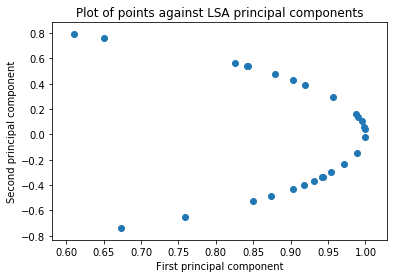

In [26]:
# Plot scatter plot of points %pylab inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(xs,ys)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Plot of points against LSA principal components')
 
plt.show()

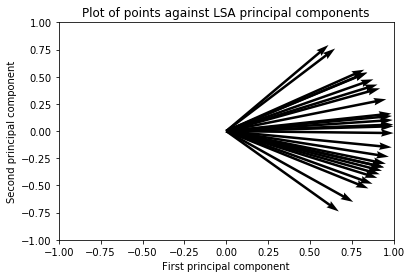

In [27]:
# Plot scatter plot of points with vectors %pylab inline
import matplotlib.pyplot as plt
plt.figure()
ax = plt.gca()
ax.quiver(0,0,xs,ys,angles='xy',scale_units='xy',scale=1, linewidth = .01)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Plot of points against LSA principal components')
plt.draw()
plt.show()

In [28]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(dtm_lsa) * np.asmatrix(dtm_lsa).T)
pd.DataFrame(similarity,index=categories, columns=categories)

,Culture_20,Nature_20,Concepts_20,History_20,Technology_20,Arts_20,Entertainment_20,Business_20,Society_20,Life_20,...,Events_20,Health_20,Education_20,Philosophy_20,Humanities_20,World_20,Mathematics_20,Sports_20,Politics_20,Geography_20
Culture_20,1.000000,0.944321,0.919145,0.979498,0.728735,0.992440,0.988193,0.406539,0.534523,0.932247,...,0.717986,-0.052531,0.356707,0.955038,0.688130,-0.001397,0.847540,0.643880,0.286417,0.770447
Nature_20,0.944321,1.000000,0.997577,0.991244,0.913475,0.896800,0.983583,0.684512,0.782838,0.999389,...,0.907030,0.278965,0.644227,0.999413,0.888552,0.327706,0.974974,0.859776,0.585711,0.937305
Concepts_20,0.919145,0.997577,1.000000,0.979658,0.939567,0.863849,0.968647,0.733566,0.824227,0.999399,...,0.934124,0.345092,0.695871,0.994609,0.918314,0.392635,0.988077,0.893218,0.640675,0.959278
History_20,0.979498,0.991244,0.979658,1.000000,0.851750,0.947367,0.998799,0.582261,0.693825,0.986025,...,0.843491,0.149724,0.537597,0.995186,0.820196,0.200087,0.937082,0.784819,0.473561,0.883080
Technology_20,0.728735,0.913475,0.939567,0.851750,1.000000,0.639179,0.825052,0.921911,0.968283,0.927135,...,0.999879,0.645569,0.899692,0.899001,0.998344,0.683777,0.981075,0.993173,0.864829,0.998012
Arts_20,0.992440,0.896800,0.863849,0.947367,0.639179,1.000000,0.961917,0.291333,0.426754,0.880792,...,0.627129,-0.174697,0.239351,0.911429,0.593874,-0.124119,0.775994,0.545107,0.166661,0.686380
Entertainment_20,0.988193,0.983583,0.968647,0.998799,0.825052,0.961917,1.000000,0.541722,0.657703,0.976677,...,0.816156,0.101094,0.495632,0.989187,0.791177,0.151835,0.918849,0.753508,0.429833,0.859026
Business_20,0.406539,0.684512,0.733566,0.582261,0.921911,0.291333,0.541722,1.000000,0.989465,0.709567,...,0.927831,0.891016,0.998547,0.659138,0.942673,0.913065,0.829452,0.960807,0.991797,0.895662
Society_20,0.534523,0.782838,0.824227,0.693825,0.968283,0.426754,0.657703,0.989465,1.000000,0.804102,...,0.972056,0.815908,0.980225,0.761065,0.981054,0.844406,0.901580,0.990818,0.962843,0.950611
Life_20,0.932247,0.999389,0.999399,0.986025,0.927135,0.880792,0.976677,0.709567,0.804102,1.000000,...,0.921189,0.312350,0.670558,0.997606,0.904040,0.360518,0.982147,0.877095,0.613675,0.948910


In [29]:
similarity = np.asarray(np.asmatrix(dtm_lsa) * np.asmatrix(dtm_lsa).T)
pd.DataFrame(similarity,index=categories, columns=categories)

,Culture_20,Nature_20,Concepts_20,History_20,Technology_20,Arts_20,Entertainment_20,Business_20,Society_20,Life_20,...,Events_20,Health_20,Education_20,Philosophy_20,Humanities_20,World_20,Mathematics_20,Sports_20,Politics_20,Geography_20
Culture_20,1.000000,0.944321,0.919145,0.979498,0.728735,0.992440,0.988193,0.406539,0.534523,0.932247,...,0.717986,-0.052531,0.356707,0.955038,0.688130,-0.001397,0.847540,0.643880,0.286417,0.770447
Nature_20,0.944321,1.000000,0.997577,0.991244,0.913475,0.896800,0.983583,0.684512,0.782838,0.999389,...,0.907030,0.278965,0.644227,0.999413,0.888552,0.327706,0.974974,0.859776,0.585711,0.937305
Concepts_20,0.919145,0.997577,1.000000,0.979658,0.939567,0.863849,0.968647,0.733566,0.824227,0.999399,...,0.934124,0.345092,0.695871,0.994609,0.918314,0.392635,0.988077,0.893218,0.640675,0.959278
History_20,0.979498,0.991244,0.979658,1.000000,0.851750,0.947367,0.998799,0.582261,0.693825,0.986025,...,0.843491,0.149724,0.537597,0.995186,0.820196,0.200087,0.937082,0.784819,0.473561,0.883080
Technology_20,0.728735,0.913475,0.939567,0.851750,1.000000,0.639179,0.825052,0.921911,0.968283,0.927135,...,0.999879,0.645569,0.899692,0.899001,0.998344,0.683777,0.981075,0.993173,0.864829,0.998012
Arts_20,0.992440,0.896800,0.863849,0.947367,0.639179,1.000000,0.961917,0.291333,0.426754,0.880792,...,0.627129,-0.174697,0.239351,0.911429,0.593874,-0.124119,0.775994,0.545107,0.166661,0.686380
Entertainment_20,0.988193,0.983583,0.968647,0.998799,0.825052,0.961917,1.000000,0.541722,0.657703,0.976677,...,0.816156,0.101094,0.495632,0.989187,0.791177,0.151835,0.918849,0.753508,0.429833,0.859026
Business_20,0.406539,0.684512,0.733566,0.582261,0.921911,0.291333,0.541722,1.000000,0.989465,0.709567,...,0.927831,0.891016,0.998547,0.659138,0.942673,0.913065,0.829452,0.960807,0.991797,0.895662
Society_20,0.534523,0.782838,0.824227,0.693825,0.968283,0.426754,0.657703,0.989465,1.000000,0.804102,...,0.972056,0.815908,0.980225,0.761065,0.981054,0.844406,0.901580,0.990818,0.962843,0.950611
Life_20,0.932247,0.999389,0.999399,0.986025,0.927135,0.880792,0.976677,0.709567,0.804102,1.000000,...,0.921189,0.312350,0.670558,0.997606,0.904040,0.360518,0.982147,0.877095,0.613675,0.948910
